<a href="https://colab.research.google.com/github/ramanathk/titanic/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
df.drop('Name',axis =1,inplace = True)

In [0]:
df.drop('PassengerId',axis =1,inplace = True)

In [0]:
df.drop('Ticket',axis =1,inplace = True)

In [0]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [0]:
df.drop('Cabin',axis =1,inplace = True)

In [0]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [0]:
cabin=df['Age']

issing vales in age


In [0]:
cabin.isnull().sum()

177

percentage of missing vales

In [0]:
perc=(cabin.isnull().sum()/len(df)*1.0)*100
perc

19.865319865319865

In [0]:
emb=df['Embarked']

In [0]:
emb.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
644+168+77

889

missing values in embarked

In [0]:
emb.isnull().sum()

2

we can fill that two with highest one that is with S

In [0]:
df['Embarked'].fillna('S', inplace=True)


In [0]:
df['Embarked'].isnull().sum()

0

In [0]:
pc=df.groupby('Embarked').mean()
pc

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,0.339009,2.346749,29.519335,0.569659,0.411765,27.243651


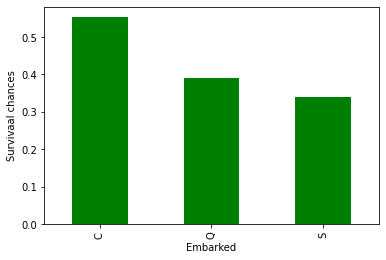

In [0]:
pc['Survived'].plot.bar(color='g')
plt.ylabel('Survivaal chances')
plt.show()

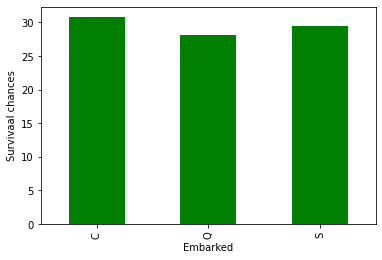

In [0]:
pc['Age'].plot.bar(color='g')
plt.ylabel('Survivaal chances')
plt.show()

In [0]:
age=df.groupby(['Age'])['Survived'].mean()
age


Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

In [0]:
age=df.groupby('Age').sum()
age

,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,
0.42,1,3,0,1,8.5167
0.67,1,2,1,1,14.5000
0.75,2,6,4,2,38.5166
0.83,2,4,1,3,47.7500
0.92,1,1,1,2,151.5500
...,...,...,...,...,...
70.00,0,3,1,1,81.5000
70.50,0,3,0,0,7.7500
71.00,0,2,0,0,84.1584


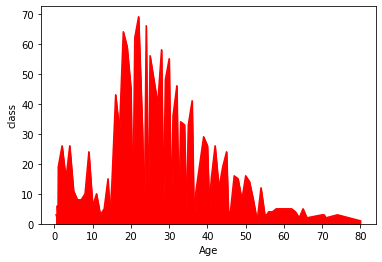

In [0]:
import matplotlib.pyplot as plt
age['Pclass'].plot.area(color = 'r')
plt.ylabel('class')
plt.show()

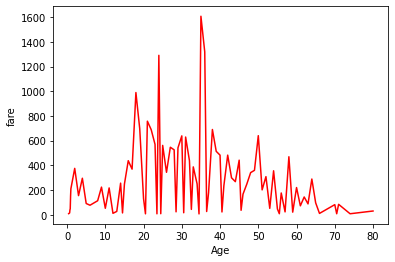

In [0]:
import matplotlib.pyplot as plt
age['Fare'].plot.line(color = 'r')
plt.ylabel('fare')
plt.show()

In [0]:
sfm=df.groupby(['Sex','Age']).mean()
sfm

Survived  Pclass  SibSp  Parch       Fare
Sex    Age                                             
female 0.75   1.000000     3.0    2.0    1.0  19.258300
       1.00   1.000000     3.0    0.5    1.5  13.437500
       2.00   0.333333     2.5    1.5    1.5  43.245833
       3.00   0.500000     2.5    2.0    1.5  31.327100
       4.00   1.000000     2.6    0.8    1.2  22.828340
...                ...     ...    ...    ...        ...
male   70.00  0.000000     1.5    0.5    0.5  40.750000
       70.50  0.000000     3.0    0.0    0.0   7.750000
       71.00  0.000000     1.0    0.0    0.0  42.079200
       74.00  0.000000     3.0    0.0    0.0   7.775000
       80.00  1.000000     1.0    0.0    0.0  30.000000

[145 rows x 5 columns]

In [0]:
sfm=df.groupby('Sex').mean()
sfm

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [0]:
age=df.groupby(['SibSp','Age']).sum()
age

Survived  Pclass  Parch      Fare
SibSp Age                                     
0     0.42          1       3      1    8.5167
      0.83          1       2      2   29.0000
      1.00          2       5      4   52.7459
      2.00          1       6      2   22.7500
      4.00          3       7      5  117.3000
...               ...     ...    ...       ...
5     1.00          0       3      2   46.9000
      9.00          0       3      2   46.9000
      11.00         0       3      2   46.9000
      14.00         0       3      2   46.9000
      16.00         0       3      2   46.9000

[185 rows x 4 columns]

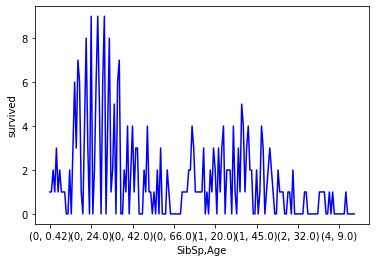

In [0]:
import matplotlib.pyplot as plt
age['Survived'].plot.line(color = 'b')
plt.ylabel('survived')
plt.show()

In [0]:
df['SibSp'].isnull().sum()

0

In [0]:
df['Parch'].isnull().sum()

0

In [0]:
cp = df.groupby(['SibSp','Parch']).mean()
cp

Survived    Pclass        Age        Fare
SibSp Parch                                           
0     0      0.303538  2.400372  32.220297   21.242689
      1      0.657895  1.789474  29.524865   73.470400
      2      0.724138  2.103448  20.993462   45.255455
      3      1.000000  3.000000  24.000000   19.258300
      4      0.000000  3.000000  29.000000   21.075000
      5      0.000000  3.000000  40.000000   34.406250
1     0      0.520325  1.959350  32.068627   42.610402
      1      0.596491  2.228070  27.064815   36.379751
      2      0.631579  1.842105  20.465882   71.615137
      3      0.333333  2.666667  39.333333   30.583333
      4      0.000000  2.333333  49.666667  106.266667
      5      0.333333  3.000000  38.666667   31.312500
      6      0.000000  3.000000  43.000000   46.900000
2     0      0.250000  2.437500  31.846154   41.411200
      1      0.857143  2.428571   8.357143   24.896414
      2      0.500000  2.000000  17.250000  148.375000
      3      1.000000  2.000000  24.000000   18.750000
3     0      1.000000  2.500000  31.500000   18.425000
      1      0.000000  3.000000   4.333333   23.584543
      2      0.285714  2.142857  13.000000  128.657143
4     1      0.000000  3.000000   6.777778   34.993056
      2      0.333333  3.000000   7.333333   28.718056
5     2      0.000000  3.000000  10.200000   46.900000
8     2      0.000000  3.000000        NaN   69.550000

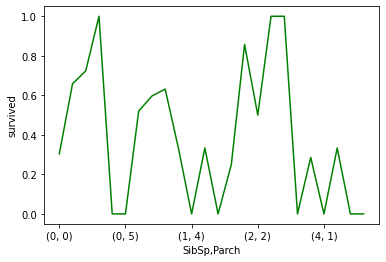

In [0]:
import matplotlib.pyplot as plt
cp['Survived'].plot.line(color = 'g')
plt.ylabel('survived')
plt.show()